In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt



In [ ]:
# 1. Load built-in IMDB dataset
max_features = 5000   # top 5000 words
max_len = 200         # maximum review length
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# # Use the default parameters to keras.datasets.imdb.load_data
start_char = 1
oov_char = 2
index_from = 3
# Retrieve the word index file mapping words to indices
word_index = tf.keras.datasets.imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[1])
print(decoded_sequence)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[START] big hair big [OOV] bad music and a giant safety [OOV] these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an [OOV] the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are [OOV] and funny in equal [OOV] the hair is big lots of [OOV] [OOV] men wear those cut [OOV] [OOV] that show off their [OOV] [OOV] that men actually wore them and the music is just [OOV] trash that plays over and over again in almost every scene there is trashy music [OOV] and [OOV] taking away bodies and the [OOV] still doesn't close for [OOV] all [OOV] aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything w

In [ ]:
# 2. Pad sequences to make them equal length
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [ ]:
x_train.shape

(25000, 200)

In [ ]:
# 3. Build simple LSTM model
model = Sequential([
    Embedding(max_features, 128),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2, ),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.build(input_shape=(None, max_len))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 689,473 (2.63 MB)

 Trainable params: 689,473 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 4. Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# 5. Train the model
print("Training model...")
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=3,
                    validation_split=0.2,
                    verbose=1)

Training model...
Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 69s 211ms/step - accuracy: 0.6783 - loss: 0.5806 - val_accuracy: 0.8380 - val_loss: 0.3939
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 202ms/step - accuracy: 0.8384 - loss: 0.3739 - val_accuracy: 0.8188 - val_loss: 0.4022
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 202ms/step - accuracy: 0.8556 - loss: 0.3328 - val_accuracy: 0.8336 - val_loss: 0.3669


In [ ]:
# 6. Evaluate on test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy*100:.2f}%")


Test Accuracy: 84.32%


In [ ]:
from sklearn.metrics import classification_report
# Step 7: Evaluate Model on Test Data
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.6).astype(int)
print("Classification Report:\n", classification_report(y_test, y_pred))

782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.84     12500
           1       0.88      0.77      0.82     12500

    accuracy                           0.83     25000
   macro avg       0.84      0.83      0.83     25000
weighted avg       0.84      0.83      0.83     25000



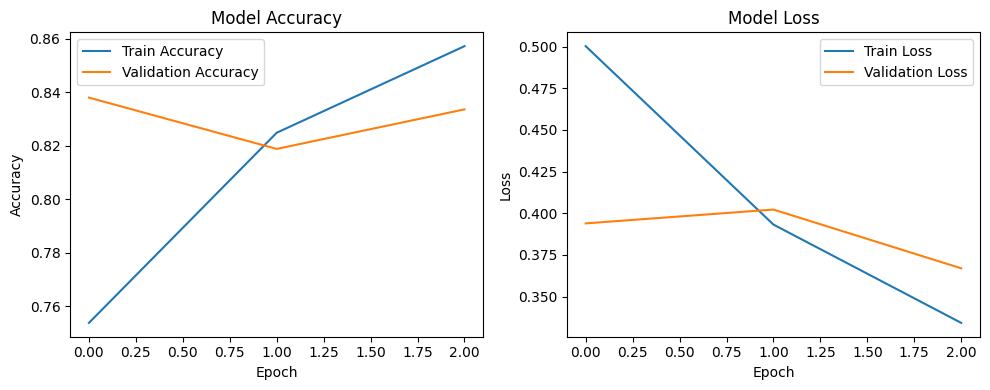

In [ ]:
# 7. Plot accuracy and loss
plt.figure(figsize=(10,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()